In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# task dictionary
task_dict = {
    'stroop_vanilla': 'task-td7i',
    'stroop_progressbar': 'task-lupf',
    'stroop_eyes': 'task-c9op',
    'stroop_video': 'task-najf',
    'stroop_posneg': 'task-on6n',
    'stroop_final': 'task-7g42',
    'stroop_bonus': 'task-3kpz',
    'rdk_vanilla': 'task-2ywa',
    'rdk_progressbar': 'task-sks3',
    'rdk_eyes': 'task-zyvq',
    'rdk_video': 'task-6e3k',
    'rdk_posneg': 'task-ivrk',
    'rdk_final': 'task-sq3v',
    'rdk_bonus': 'task-hvii',
    'bandit_vanilla': 'task-dwkr',
    'bandit_progressbar': 'task-25bt',
    'bandit_eyes': 'task-x158',
    'bandit_video': 'task-9ndm',
    'bandit_posneg': 'task-tzk1',
    'bandit_final': 'task-gn7s',
    'bandit_bonus': 'task-iaas',
}

# task-separated arrays
stroop_arr = ["stroop_vanilla", "stroop_progressbar", "stroop_eyes", "stroop_video", "stroop_posneg", "stroop_final", "stroop_bonus"]
rdk_arr = ["rdk_vanilla", "rdk_progressbar", "rdk_eyes", "rdk_video", "rdk_posneg", "rdk_final", "rdk_bonus"]
bandit_arr = ["bandit_vanilla", "bandit_progressbar", "bandit_eyes", "bandit_video", "bandit_posneg", "bandit_final", "bandit_bonus"]
# stroop_arr = ["stroop_vanilla", "stroop_progressbar", "stroop_eyes", "stroop_posneg", "stroop_final", "stroop_bonus"]
# rdk_arr = ["rdk_vanilla", "rdk_progressbar", "rdk_eyes", "rdk_posneg", "rdk_final", "rdk_bonus"]
# bandit_arr = ["bandit_vanilla", "bandit_progressbar", "bandit_eyes", "bandit_posneg", "bandit_final", "bandit_bonus"]

In [3]:
# creating stroop dataset
# currently trying to get data from two different versions, hence two loops (will not be needed in real analysis)

stroop_list = []

for manip in stroop_arr:
    stroop_df = pd.read_csv('./data_exp_96489-v6/data_exp_96489-v6_' + task_dict[manip] + '.csv')
    stroop_df.drop(stroop_df[stroop_df['Event Index'] == 'END OF FILE'].index, inplace = True)
    stroop_list.append(stroop_df)
    
# for manip in stroop_arr:
#     stroop_df = pd.read_csv('./data_exp_96489-v3/data_exp_96489-v3_' + task_dict[manip] + '.csv')
#     stroop_df.drop(stroop_df[stroop_df['Event Index'] == 'END OF FILE'].index, inplace = True)
#     stroop_list.append(stroop_df)
    
stroop_df = pd.concat(stroop_list)

# creating rdk dataset
rdk_list = []

for manip in rdk_arr:
    rdk_df = pd.read_csv('./data_exp_96489-v6/data_exp_96489-v6_' + task_dict[manip] + '.csv')
    rdk_df.drop(rdk_df[rdk_df['Event Index'] == 'END OF FILE'].index, inplace = True)
    rdk_list.append(rdk_df)
    
# for manip in rdk_arr:
#     rdk_df = pd.read_csv('./data_exp_96489-v3/data_exp_96489-v3_' + task_dict[manip] + '.csv')
#     rdk_df.drop(rdk_df[rdk_df['Event Index'] == 'END OF FILE'].index, inplace = True)
#     rdk_list.append(rdk_df)
    
rdk_df = pd.concat(rdk_list)

# creating bandit dataset
bandit_list = []

for manip in bandit_arr:
    bandit_df = pd.read_csv('./data_exp_96489-v6/data_exp_96489-v6_' + task_dict[manip] + '.csv')
    bandit_df.drop(bandit_df[bandit_df['Event Index'] == 'END OF FILE'].index, inplace = True)
    bandit_list.append(bandit_df)
    
# for manip in bandit_arr:
#     bandit_df = pd.read_csv('./data_exp_96489-v3/data_exp_96489-v3_' + task_dict[manip] + '.csv')
#     bandit_df.drop(bandit_df[bandit_df['Event Index'] == 'END OF FILE'].index, inplace = True)
#     bandit_list.append(bandit_df)
    
bandit_df = pd.concat(bandit_list)

In [4]:
rdk_df['Tree Node Key'].value_counts()

task-6e3k    2555
task-ivrk    2463
task-sq3v    1714
task-hvii    1288
task-2ywa     921
task-zyvq     857
task-sks3     852
Name: Tree Node Key, dtype: int64

In [5]:
def accuracy_calculator (df, arr):

    accuracies = []
    for manip in arr:

        focus_df = df[df['Tree Node Key'] == task_dict[manip]]
        participants = focus_df['Participant Private ID'].unique().tolist()
        overall_accuracy = 0.0
        if len(participants) < 1:
            accuracies.append(overall_accuracy)
            continue

        for participant in participants:
            participant_df = focus_df[focus_df['Participant Private ID'] == participant]
            participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Attempt', 'Correct', 'Incorrect']]

            # for timeouts
            participant_df['Attempt'].fillna(0, inplace = True)
            
            if participant_df.empty:
                participants.remove(participant)
                continue

            accuracy = participant_df['Correct'].sum() / len(participant_df)
            overall_accuracy += accuracy

        overall_accuracy /= len(participants)
        accuracies.append(overall_accuracy * 100)

    return accuracies

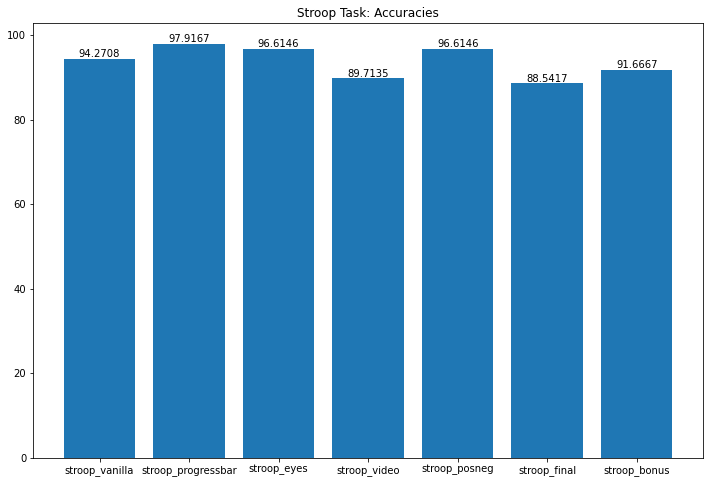

In [6]:
stroop_accuracies = accuracy_calculator(stroop_df, stroop_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(stroop_arr, stroop_accuracies)
ax.bar_label(plot)
ax.set_title('Stroop Task: Accuracies')
plt.show()

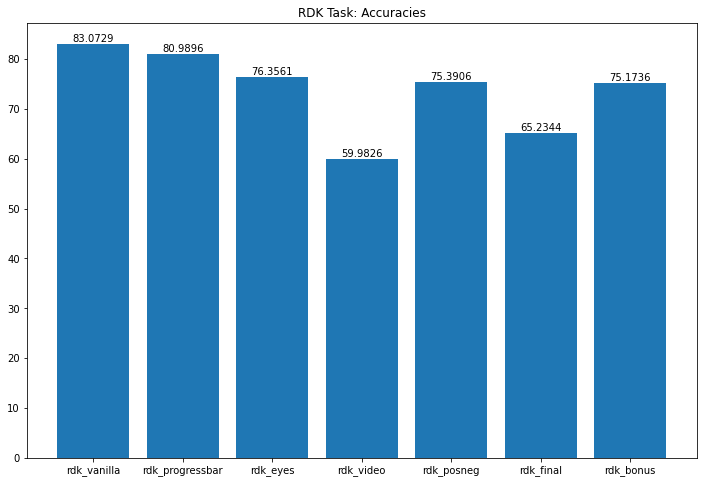

In [7]:
rdk_accuracies = accuracy_calculator(rdk_df, rdk_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(rdk_arr, rdk_accuracies)
ax.bar_label(plot)
ax.set_title('RDK Task: Accuracies')
plt.show()

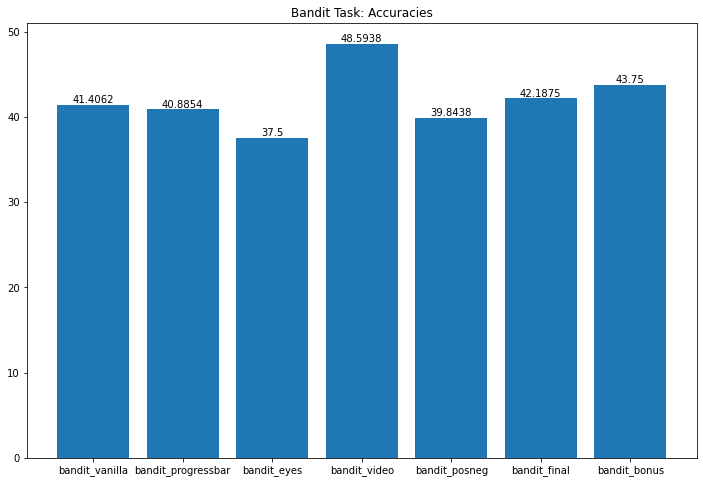

In [8]:
bandit_accuracies = accuracy_calculator(bandit_df, bandit_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(bandit_arr, bandit_accuracies)
ax.bar_label(plot)
ax.set_title('Bandit Task: Accuracies')
plt.show()

In [9]:
bandit_df.head()

,Event Index,UTC Timestamp,UTC Date,Local Timestamp,Local Timezone,Local Date,Experiment ID,Experiment Version,Tree Node Key,Repeat Key,...,Correct Answers,Stimuli 1,Stimuli 2,Stimuli 3,Stimuli 4,TimedSection,ANSWER,Best Choice,ShowProgressBar,ShowProgressBar1
0,1,1.670774e+12,11/12/2022 15:48:14,1.670774e+12,0.0,11/12/2022 15:47:21,96489.0,6.0,task-dwkr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.670774e+12,11/12/2022 15:48:17,1.670774e+12,0.0,11/12/2022 15:47:24,96489.0,6.0,task-dwkr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.670774e+12,11/12/2022 15:48:17,1.670774e+12,0.0,11/12/2022 15:47:24,96489.0,6.0,task-dwkr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.670774e+12,11/12/2022 15:48:53,1.670774e+12,0.0,11/12/2022 15:48:00,96489.0,6.0,task-dwkr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.670774e+12,11/12/2022 15:48:57,1.670774e+12,0.0,11/12/2022 15:48:04,96489.0,6.0,task-dwkr,NaN,...,"[""top""]",bandit-1-3.png,bandit-1-1.png,bandit-1-0.png,bandit-1-2.png,NaN,NaN,bandit-1-1.png,NaN,NaN


In [10]:
def reaction_time_calculator (df, arr):

    reaction_times = []
    for manip in arr:

        focus_df = df[df['Tree Node Key'] == task_dict[manip]]
        participants = focus_df['Participant Private ID'].unique().tolist()
        overall_reaction_time = 0.0
        if len(participants) < 1:
            reaction_times.append(overall_reaction_time)
            continue

        for participant in participants:
            participant_df = focus_df[focus_df['Participant Private ID'] == participant]
            participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Reaction Time']]
            
            if participant_df.empty:
                participants.remove(participant)
                continue

            reaction_time = participant_df['Reaction Time'].astype('float').sum() / len(participant_df)
            overall_reaction_time += reaction_time

        overall_reaction_time /= len(participants)
        reaction_times.append(overall_reaction_time)

    return reaction_times

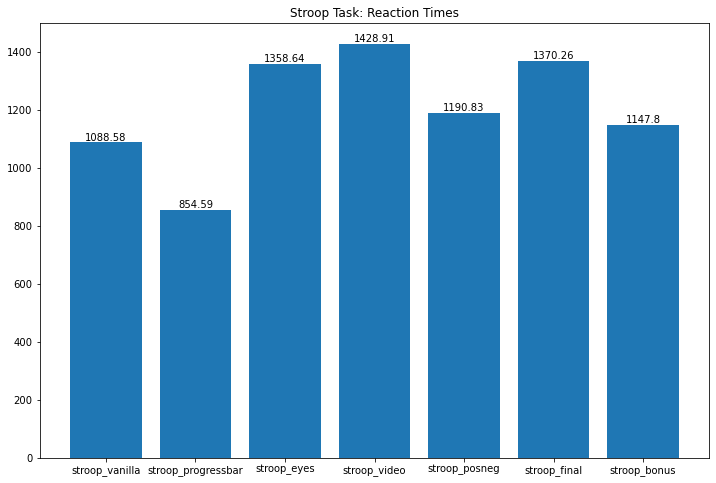

In [11]:
stroop_reaction_times = reaction_time_calculator(stroop_df, stroop_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(stroop_arr, stroop_reaction_times)
ax.bar_label(plot)
ax.set_title('Stroop Task: Reaction Times')
plt.show()

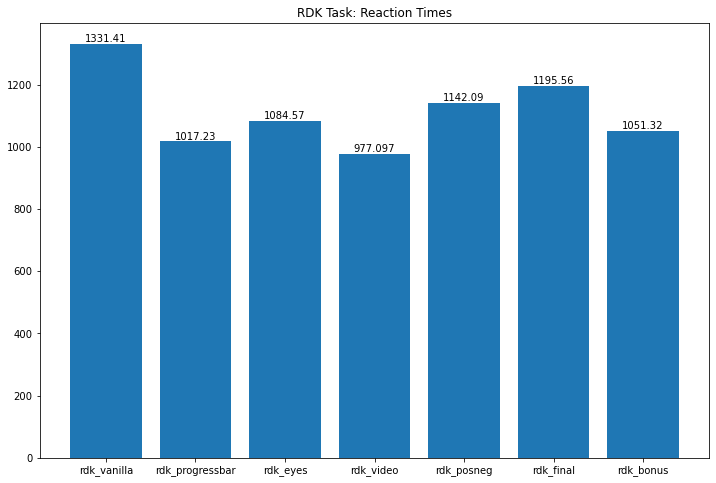

In [12]:
rdk_reaction_times = reaction_time_calculator(rdk_df, rdk_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(rdk_arr, rdk_reaction_times)
ax.bar_label(plot)
ax.set_title('RDK Task: Reaction Times')
plt.show()

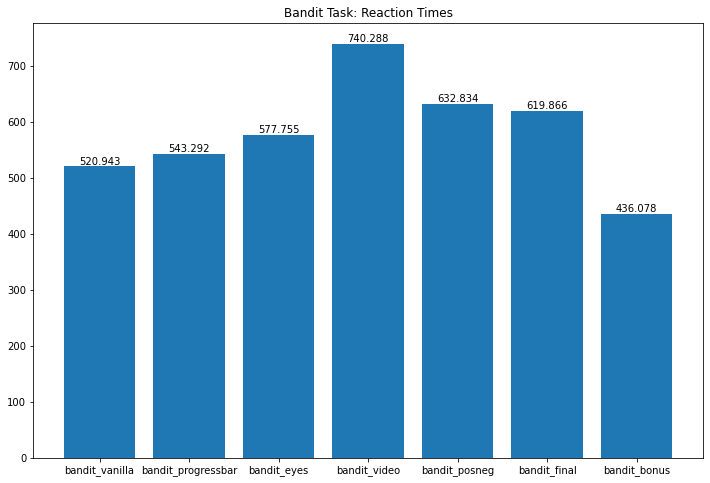

In [13]:
bandit_reaction_times = reaction_time_calculator(bandit_df, bandit_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(bandit_arr, bandit_reaction_times)
ax.bar_label(plot)
ax.set_title('Bandit Task: Reaction Times')
plt.show()

In [14]:
def posneg_feedback_counter (df, arr):
    
    pos_count_arr = []
    neg_count_arr = []
    manip = [m for m in arr if 'posneg' in m][0]
    focus_df = df[df['Tree Node Key'] == task_dict[manip]]
    participants = pd.unique(focus_df['Participant Private ID'])

    for participant in participants:
        participant_df = focus_df[focus_df['Participant Private ID'] == participant]
        pos_count_arr.append((participant_df['Screen Name'] == 'positive_feedback').sum())
        neg_count_arr.append((participant_df['Screen Name'] == 'negative_feedback').sum())

    return pos_count_arr, neg_count_arr

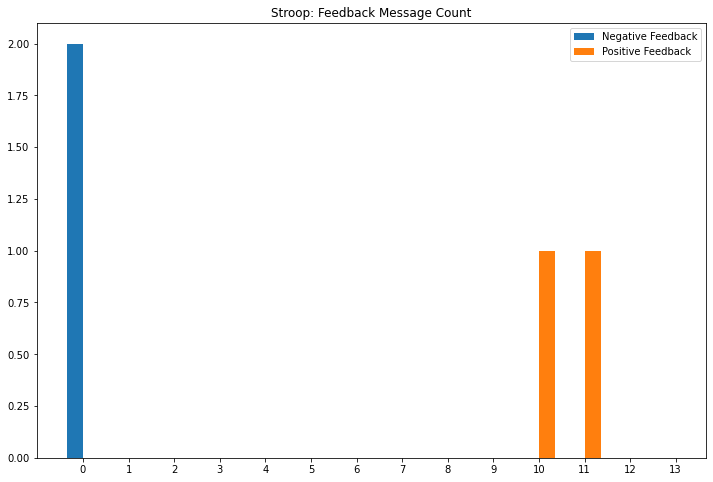

In [15]:
stroop_pos_count, stroop_neg_count = posneg_feedback_counter(stroop_df, stroop_arr)
width = 0.35

fig, ax = plt.subplots(figsize=(12,8))
lower = ax.hist(stroop_neg_count, bins=np.arange(0, 14)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(stroop_pos_count, bins=np.arange(0, 14), label='Positive Feedback', width=width)
ax.set_title('Stroop: Feedback Message Count')
ax.set_xticks(np.arange(0, 14))
ax.legend()
plt.show()

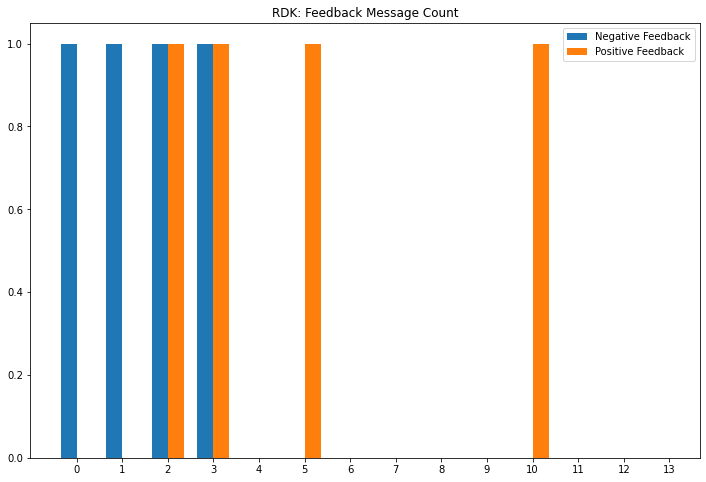

In [16]:
rdk_pos_count, rdk_neg_count = posneg_feedback_counter(rdk_df, rdk_arr)

fig, ax = plt.subplots(figsize=(12,8))
lower = ax.hist(rdk_neg_count, bins=np.arange(0, 14)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(rdk_pos_count, bins=np.arange(0, 14), label='Positive Feedback', width=width)
ax.set_title('RDK: Feedback Message Count')
ax.set_xticks(np.arange(0, 14))
ax.legend()
plt.show()

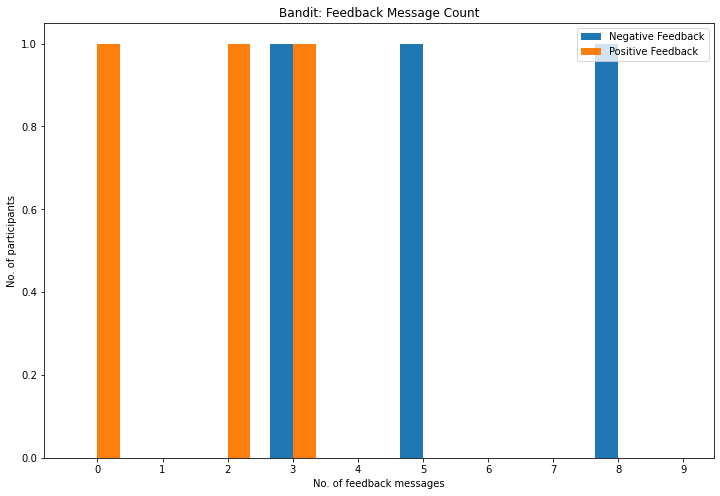

In [17]:
bandit_pos_count, bandit_neg_count = posneg_feedback_counter(bandit_df, bandit_arr)

fig, ax = plt.subplots(figsize=(12,8))
lower = ax.hist(bandit_neg_count, bins=np.arange(0, 10)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(bandit_pos_count, bins=np.arange(0, 10), label='Positive Feedback', width=width)
ax.set_title('Bandit: Feedback Message Count')
ax.set_xticks(np.arange(0, 10))
ax.set_ylabel('No. of participants')
ax.set_xlabel('No. of feedback messages')
ax.legend()
plt.show()

In [18]:
def bonus_counter(df, arr):
    
    bonus = 0
    manip = [m for m in arr if 'bonus' in m][0]
    focus_df = df[df['Tree Node Key'] == task_dict[manip]]
    participants = pd.unique(focus_df['Participant Private ID'])
    
    bonus_df = focus_df[focus_df['Trial Number'] == 'bonusAwarded']
    bonus = (bonus_df['Response'] == 'true').sum()

    return bonus, participants.size

In [19]:
stroop_bonus, stroop_total = bonus_counter(stroop_df, stroop_arr)
rdk_bonus, rdk_total = bonus_counter(rdk_df, rdk_arr)
bandit_bonus, bandit_total = bonus_counter(bandit_df, bandit_arr)
print("Stroop task bonus winners: " + str(stroop_bonus) + "/" + str(stroop_total))
print("RDK task bonus winners: " + str(rdk_bonus) + "/" + str(rdk_total))
print("Bandit task bonus winners: " + str(bandit_bonus) + "/" + str(bandit_total))

Stroop task bonus winners: 1/2
RDK task bonus winners: 1/3
Bandit task bonus winners: 2/3


### I. ACCURACIES PER TASK

In [48]:
def accuracies_per_task (df, task):

    accuracies = []
    task_arr = []
    
    focus_df = df[df['Tree Node Key'] == task_dict[task]]
    participants = focus_df['Participant Private ID'].unique().tolist()

    for participant in participants:
        participant_df = focus_df[focus_df['Participant Private ID'] == participant]
        participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Attempt', 'Correct', 'Incorrect']]

        if participant_df.empty:
            participants.remove(participant)
            continue
        
        # for timeouts
        participant_df['Attempt'].fillna(0, inplace = True)

        accuracy = participant_df['Correct'].sum() / len(participant_df)
        accuracies.append(accuracy * 100)
        task_arr.append(task)

    return task_arr, accuracies

<AxesSubplot:xlabel='Task', ylabel='Accuracy'>

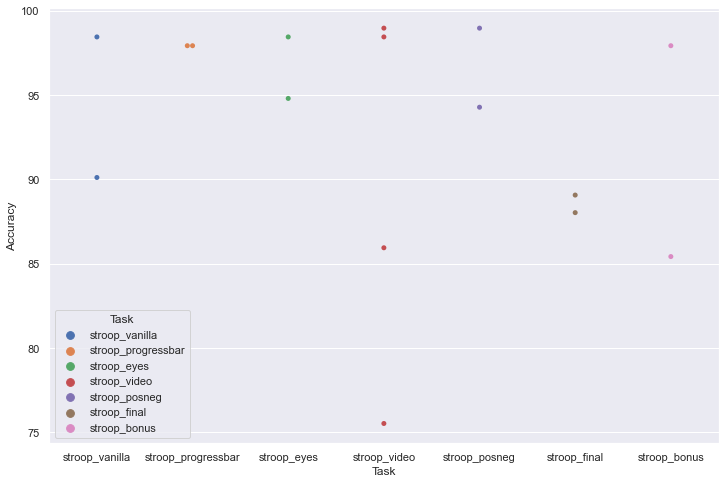

In [49]:
stroop_accuracies = []
stroop_tasks = []
for manip in stroop_arr:
    manip_arr, manip_acc = accuracies_per_task(stroop_df, manip)
    stroop_accuracies.append(manip_acc)
    stroop_tasks.append(manip_arr)
    
stroop_accuracies = [item for sublist in stroop_accuracies for item in sublist]
stroop_tasks = [item for sublist in stroop_tasks for item in sublist]
stroop_acc_df = pd.DataFrame({'Task': stroop_tasks, 'Accuracy': stroop_accuracies})
fig = plt.figure(figsize=(12,8))

# sns.boxplot(data=stroop_acc_df, x = 'Task', y='Accuracy', hue='Task')
sns.swarmplot(data=stroop_acc_df, x = 'Task', y='Accuracy', hue='Task')

<AxesSubplot:xlabel='Task', ylabel='Accuracy'>

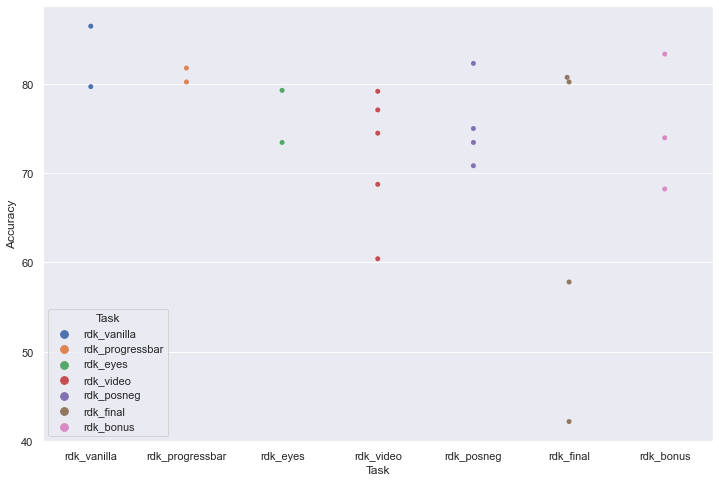

In [50]:
rdk_accuracies = []
rdk_tasks = []
for manip in rdk_arr:
    manip_arr, manip_acc = accuracies_per_task(rdk_df, manip)
    rdk_accuracies.append(manip_acc)
    rdk_tasks.append(manip_arr)
    
rdk_accuracies = [item for sublist in rdk_accuracies for item in sublist]
rdk_tasks = [item for sublist in rdk_tasks for item in sublist]
rdk_acc_df = pd.DataFrame({'Task': rdk_tasks, 'Accuracy': rdk_accuracies})
fig = plt.figure(figsize=(12,8))

# sns.violinplot(data=rdk_acc_df, x = 'Task', y='Accuracy', hue='Task')
sns.swarmplot(data=rdk_acc_df, x = 'Task', y='Accuracy', hue='Task')

<AxesSubplot:xlabel='Task', ylabel='Accuracy'>

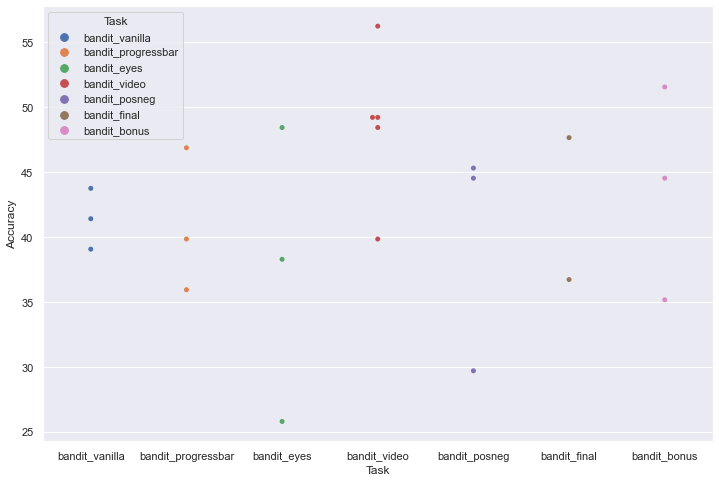

In [51]:
bandit_accuracies = []
bandit_tasks = []
for manip in bandit_arr:
    manip_arr, manip_acc = accuracies_per_task(bandit_df, manip)
    bandit_accuracies.append(manip_acc)
    bandit_tasks.append(manip_arr)
    
bandit_accuracies = [item for sublist in bandit_accuracies for item in sublist]
bandit_tasks = [item for sublist in bandit_tasks for item in sublist]
bandit_acc_df = pd.DataFrame({'Task': bandit_tasks, 'Accuracy': bandit_accuracies})
fig = plt.figure(figsize=(12,8))

# sns.boxplot(data=bandit_acc_df, x = 'Task', y='Accuracy', hue='Task')
sns.swarmplot(data=bandit_acc_df, x = 'Task', y='Accuracy', hue='Task')

### II. SCATTER PLOT - ACCURACY VS POSNEG FEEDBACK

In [24]:
def accuracy_vs_posneg(df, arr):
    
    acc_posneg_df = pd.DataFrame(columns=['Participant', 'Accuracy', 'Positive Feedback', 'Negative Feedback'])
    manip = [m for m in arr if 'posneg' in m][0]
    focus_df = df[df['Tree Node Key'] == task_dict[manip]]
    participants = pd.unique(focus_df['Participant Private ID'])
    
    for participant in participants:
        participant_df = focus_df[focus_df['Participant Private ID'] == participant]
        pos_count = (participant_df['Screen Name'] == 'positive_feedback').sum()
        neg_count = (participant_df['Screen Name'] == 'negative_feedback').sum()
        participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Attempt', 'Correct', 'Incorrect']]
        participant_df['Attempt'].fillna(0, inplace = True)
        accuracy = (participant_df['Correct'].sum() * 100) / len(participant_df)
        acc_posneg_df = acc_posneg_df.append({
            'Participant': participant, 
            'Accuracy': accuracy, 
            'Positive Feedback': pos_count, 
            'Negative Feedback': neg_count
        }, ignore_index=True)
    
    return acc_posneg_df

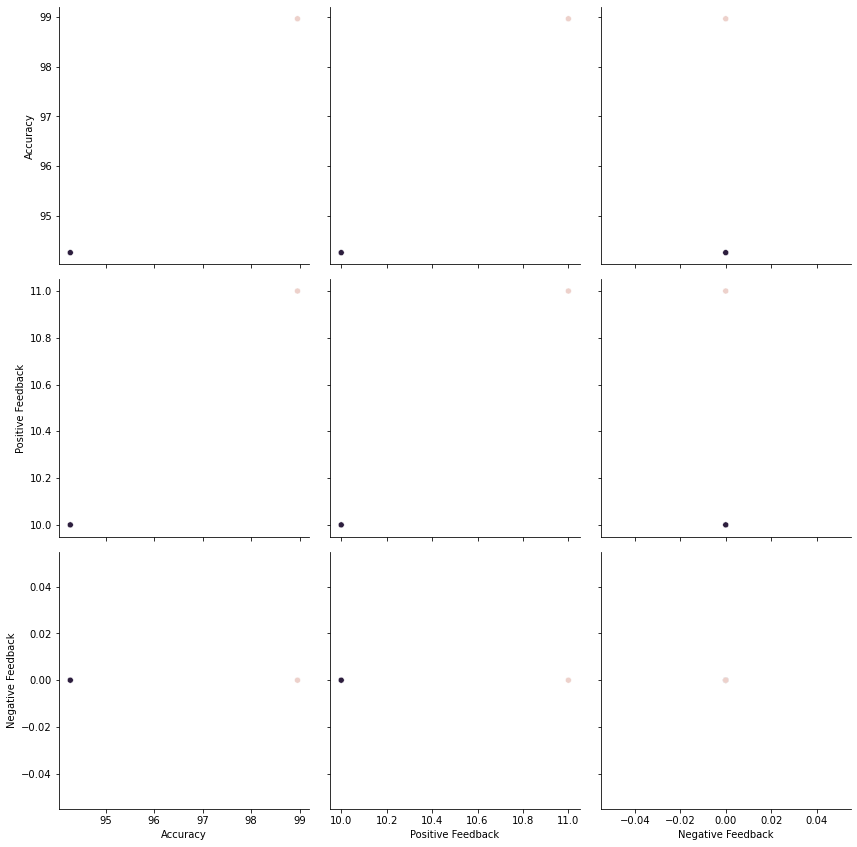

In [25]:
stroop_acc_posneg_df = accuracy_vs_posneg(stroop_df, stroop_arr)
rdk_acc_posneg_df = accuracy_vs_posneg(rdk_df, rdk_arr)
bandit_acc_posneg_df = accuracy_vs_posneg(bandit_df, bandit_arr)

g = sns.PairGrid(stroop_acc_posneg_df, hue='Participant', height=4)
g.map(sns.scatterplot)

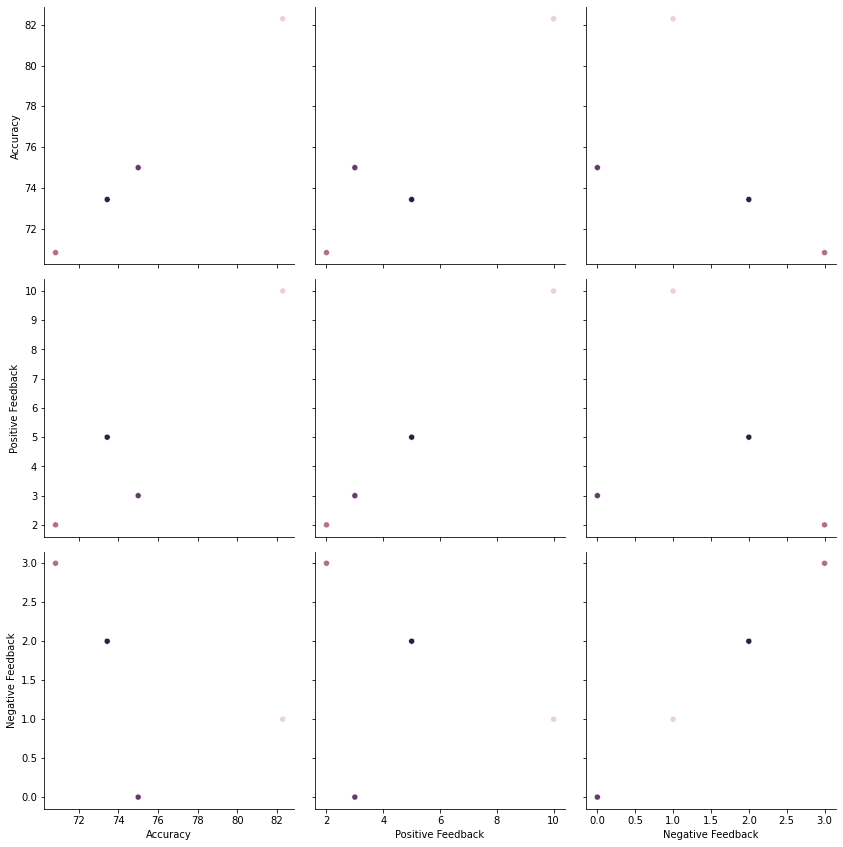

In [26]:
g = sns.PairGrid(rdk_acc_posneg_df, hue='Participant', height=4)
g.map(sns.scatterplot)

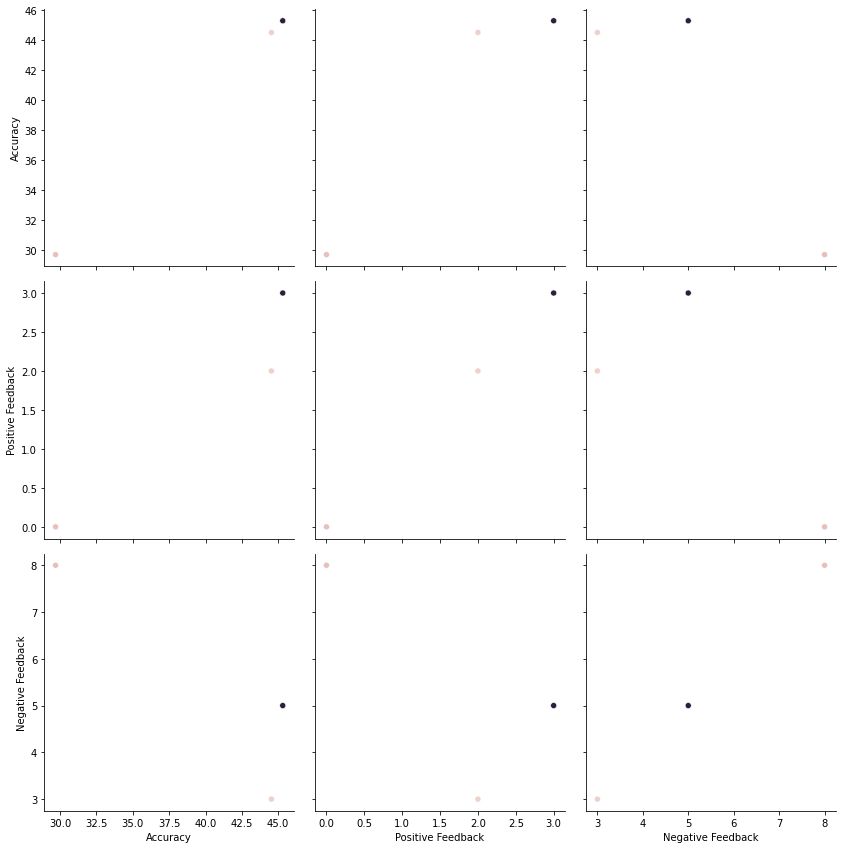

In [27]:
g = sns.PairGrid(bandit_acc_posneg_df, hue='Participant', height=4)
g.map(sns.scatterplot)

### III. NUMBER OF PEOPLE QUALIFYING BONUS CRITERIA PER TASK

In [28]:
def potential_bonus_calculator(df, arr, bonus_threshold):
    
    potential_bonus_df = pd.DataFrame(columns=['Task', 'Bonus Awarded', 'Bonus Not Awarded'])
    bonus = []
    task_arr = []
    
    for manip in arr:
        focus_df = df[df['Tree Node Key'] == task_dict[manip]]
        participants = pd.unique(focus_df['Participant Private ID'])
        bonus_awardees = 0

        for participant in participants:
            participant_df = focus_df[focus_df['Participant Private ID'] == participant]
            participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Attempt', 'Correct', 'Incorrect']]

            # for timeouts
            participant_df['Attempt'].fillna(0, inplace = True)

            accuracy = participant_df['Correct'].sum() / len(participant_df)
            if accuracy >= bonus_threshold:
                bonus_awardees += 1
        
        bonus_non_awardees = participants.size - bonus_awardees
        potential_bonus_df = potential_bonus_df.append({
            'Task': manip, 
            'Bonus Awarded': bonus_awardees, 
            'Bonus Not Awarded': bonus_non_awardees
        }, ignore_index=True)
    
    return potential_bonus_df

50.0


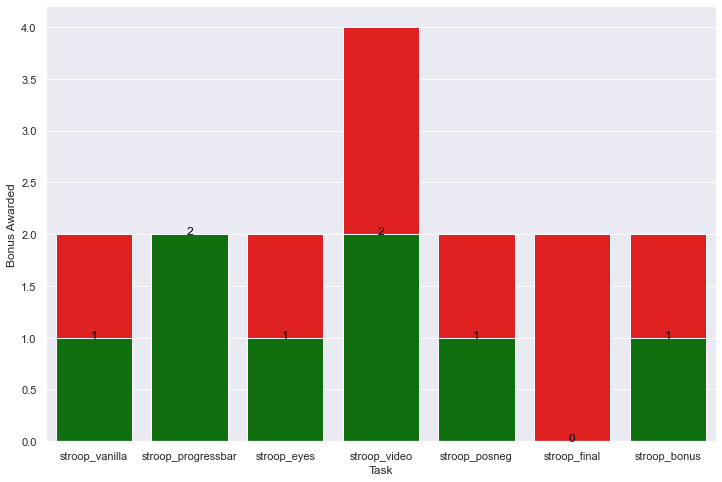

In [29]:
bonus_stroop = 0.96875
stroop_potential_bonus_df = potential_bonus_calculator(stroop_df, stroop_arr, bonus_stroop)

plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
stroop_potential_bonus_df["Sum"] = stroop_potential_bonus_df["Bonus Awarded"] + stroop_potential_bonus_df["Bonus Not Awarded"]
# stroop_potential_bonus_df["Percentage"] = stroop_potential_bonus_df["Bonus Awarded"] * 100 / stroop_potential_bonus_df["Sum"]
g = sns.barplot(data=stroop_potential_bonus_df, x='Task', y='Sum', color='red')
bar2 = sns.barplot(data=stroop_potential_bonus_df, x='Task', y='Bonus Awarded', color='green')
for index, row in stroop_potential_bonus_df.iterrows():
    g.text(row.name, row["Bonus Awarded"], round(row["Bonus Awarded"], 2), color='black', ha="center")
print(stroop_potential_bonus_df["Bonus Awarded"].sum() * 100 / stroop_potential_bonus_df["Sum"].sum())

50.0


C:\Users\Devank\AppData\Local\Temp/ipykernel_22104/1202938263.py:19: RuntimeWarning: invalid value encountered in double_scalars
  accuracy = participant_df['Correct'].sum() / len(participant_df)


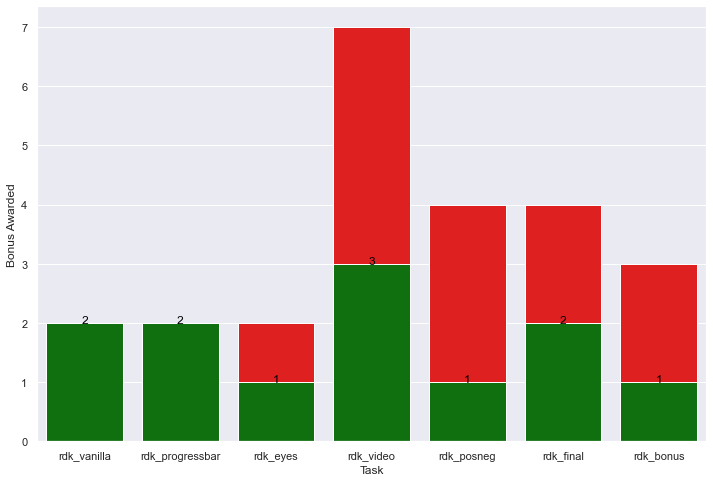

In [30]:
bonus_rdk = 0.75005
rdk_potential_bonus_df = potential_bonus_calculator(rdk_df, rdk_arr, bonus_rdk)

plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
rdk_potential_bonus_df["Sum"] = rdk_potential_bonus_df["Bonus Awarded"] + rdk_potential_bonus_df["Bonus Not Awarded"]
g = sns.barplot(data=rdk_potential_bonus_df, x='Task', y='Sum', color='red')
bar2 = sns.barplot(data=rdk_potential_bonus_df, x='Task', y='Bonus Awarded', color='green')
for index, row in rdk_potential_bonus_df.iterrows():
    g.text(row.name, row["Bonus Awarded"], round(row["Bonus Awarded"], 2), color='black', ha="center")
print(rdk_potential_bonus_df["Bonus Awarded"].sum() * 100 / rdk_potential_bonus_df["Sum"].sum())

54.54545454545455


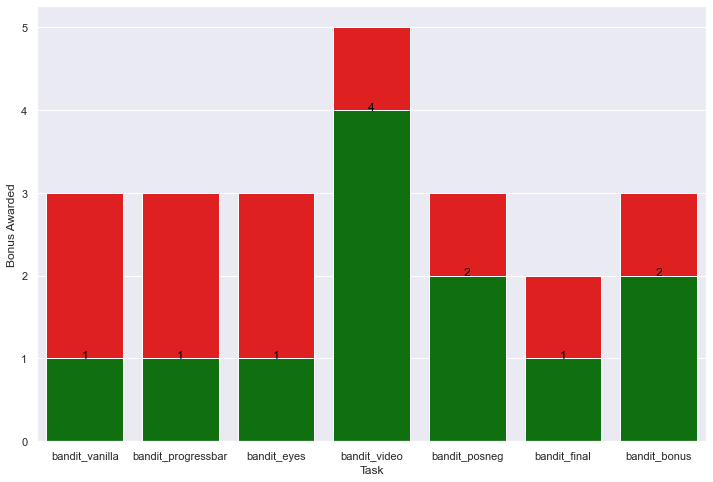

In [31]:
bonus_bandit = 0.43750
bandit_potential_bonus_df = potential_bonus_calculator(bandit_df, bandit_arr, bonus_bandit)

plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
bandit_potential_bonus_df["Sum"] = bandit_potential_bonus_df["Bonus Awarded"] + bandit_potential_bonus_df["Bonus Not Awarded"]
g = sns.barplot(data=bandit_potential_bonus_df, x='Task', y='Sum', color='red')
bar2 = sns.barplot(data=bandit_potential_bonus_df, x='Task', y='Bonus Awarded', color='green')
for index, row in bandit_potential_bonus_df.iterrows():
    g.text(row.name, row["Bonus Awarded"], round(row["Bonus Awarded"], 2), color='black', ha="center")
print(bandit_potential_bonus_df["Bonus Awarded"].sum() * 100 / bandit_potential_bonus_df["Sum"].sum())

##### IV. SIMULATOR FOR DIFFERENT THRESHOLDS FOR POSNEG FEEDBACK

In [32]:
def get_posneg_df(df, arr):
    
    final_list = []
    manip = [m for m in arr if 'posneg' in m][0]
    focus_df = df[df['Tree Node Key'] == task_dict[manip]]
    participants = pd.unique(focus_df['Participant Private ID'])
    
    for participant in participants:
        participant_df = focus_df[focus_df['Participant Private ID'] == participant]
        participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Participant Private ID', 'Attempt', 'Correct', 'Incorrect']]
        participant_df["Participant Private ID"].astype(str)
        # for timeouts
        participant_df['Attempt'].fillna(0, inplace = True)
        final_list.append(participant_df)
    
    return pd.concat(final_list)

In [33]:
def results_per_participant_posneg(focus_df):
    
    results_posneg_df = pd.DataFrame(columns=['Participant', 'Accuracy'])
    participants = pd.unique(focus_df['Participant Private ID'])
    
    for participant in participants:
        participant_df = focus_df[focus_df['Participant Private ID'] == participant]
        first_index = 0
        
        for i in range(len(participant_df) // 16):
            block_df = participant_df[first_index:first_index+16]
            accuracy = block_df['Correct'].sum() / len(block_df)
            results_posneg_df = results_posneg_df.append({
                'Participant': participant,
                'Accuracy': accuracy
            }, ignore_index=True)
            first_index += 16
    
    return results_posneg_df

In [34]:
# stroop
stroop_posneg_df = get_posneg_df(stroop_df, stroop_arr)
stroop_results_posneg_df = results_per_participant_posneg(stroop_posneg_df)

# rdk
rdk_posneg_df = get_posneg_df(rdk_df, rdk_arr)
rdk_results_posneg_df = results_per_participant_posneg(rdk_posneg_df)

#bandit
bandit_posneg_df = get_posneg_df(bandit_df, bandit_arr)
bandit_results_posneg_df = results_per_participant_posneg(bandit_posneg_df)

print(bandit_results_posneg_df["Accuracy"].value_counts())

0.2500    5
0.3750    5
0.3125    4
0.4375    2
0.6250    2
0.1875    2
0.5000    1
0.7500    1
0.8750    1
0.5625    1
Name: Accuracy, dtype: int64


C:\Users\Devank\.conda\envs\data_literacy\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


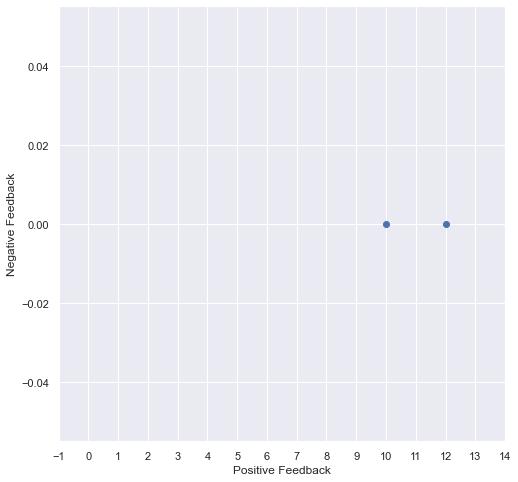

Average positive feedback messages per participant: 11.0
Average negative feedback messages per participant: 0.0


In [35]:
from matplotlib.widgets import Slider

def f(df, pos_threshold, neg_threshold):
    new_df = df
    new_df['pos'] = 0
    new_df['neg'] = 0
    new_df['pos'].values[new_df['Accuracy'].values >= pos_threshold] = 1
    new_df['neg'].values[new_df['Accuracy'].values <= neg_threshold] = 1
    return new_df.groupby('Participant').agg({'pos': 'sum', 'neg': 'sum'}).reset_index()

stroop_new_posneg_counts = f(stroop_results_posneg_df, 15/16, 12/16)
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data = stroop_new_posneg_counts, x="pos", y="neg", cmap="Reds", shade=True)
plot = ax.scatter(stroop_new_posneg_counts["pos"], stroop_new_posneg_counts["neg"])
ax.set_xticks(np.arange(-1, 15, 1))
ax.set_xlabel('Positive Feedback')
ax.set_ylabel('Negative Feedback')
plt.show()

print("Average positive feedback messages per participant: " + str(stroop_new_posneg_counts["pos"].mean()))
print("Average negative feedback messages per participant: " + str(stroop_new_posneg_counts["neg"].mean()))


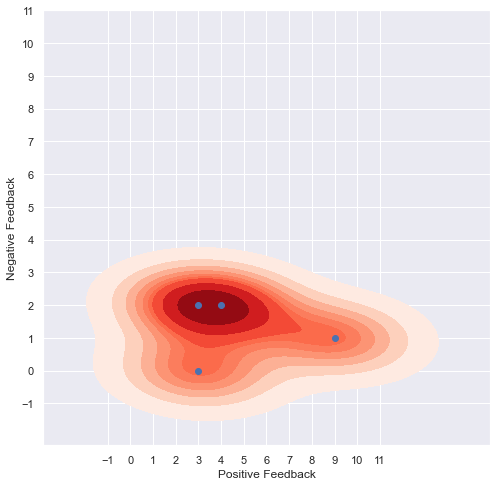

Average positive feedback messages per participant: 4.75
Average negative feedback messages per participant: 1.25


In [36]:
rdk_new_posneg_counts = f(rdk_results_posneg_df, 13/16, 10/16)
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data = rdk_new_posneg_counts, x="pos", y="neg", cmap="Reds", shade=True)
plot = ax.scatter(rdk_new_posneg_counts["pos"], rdk_new_posneg_counts["neg"])
ax.set_xticks(np.arange(-1, 12, 1))
ax.set_yticks(np.arange(-1, 12, 1))
ax.set_xlabel('Positive Feedback')
ax.set_ylabel('Negative Feedback')
plt.show()
print("Average positive feedback messages per participant: " + str(rdk_new_posneg_counts["pos"].mean()))
print("Average negative feedback messages per participant: " + str(rdk_new_posneg_counts["neg"].mean()))


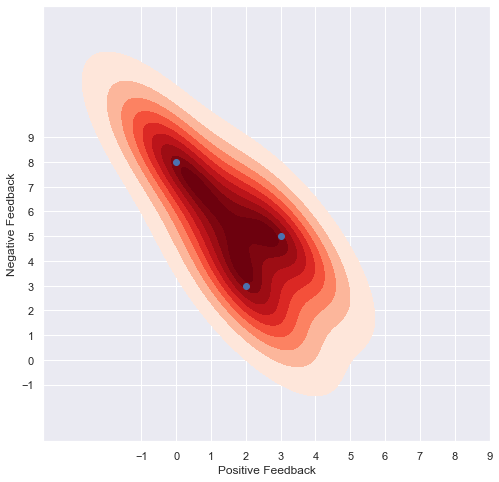

Average positive feedback messages per participant: 1.6666666666666667
Average negative feedback messages per participant: 5.333333333333333


In [37]:
bandit_new_posneg_counts = f(bandit_results_posneg_df, 9/16, 6/16)
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data = bandit_new_posneg_counts, x="pos", y="neg", cmap="Reds", shade=True)
plot = ax.scatter(bandit_new_posneg_counts["pos"], bandit_new_posneg_counts["neg"])
ax.set_xticks(np.arange(-1, 10, 1))
ax.set_yticks(np.arange(-1, 10, 1))
ax.set_xlabel('Positive Feedback')
ax.set_ylabel('Negative Feedback')
plt.show()
print("Average positive feedback messages per participant: " + str(bandit_new_posneg_counts["pos"].mean()))
print("Average negative feedback messages per participant: " + str(bandit_new_posneg_counts["neg"].mean()))

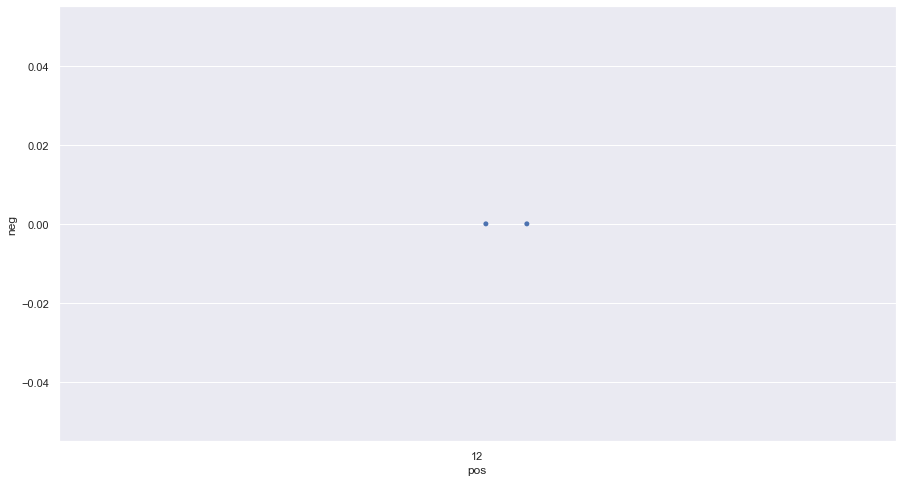

In [38]:
stroop_pos_threshold = 0.75
stroop_neg_threshold = 0.35

fig = plt.figure(figsize=(15,8))
stroop_new_posneg_counts = f(stroop_results_posneg_df, stroop_pos_threshold, stroop_neg_threshold)
plot = sns.stripplot(data=stroop_new_posneg_counts, x = 'pos', y='neg', jitter=0.2)

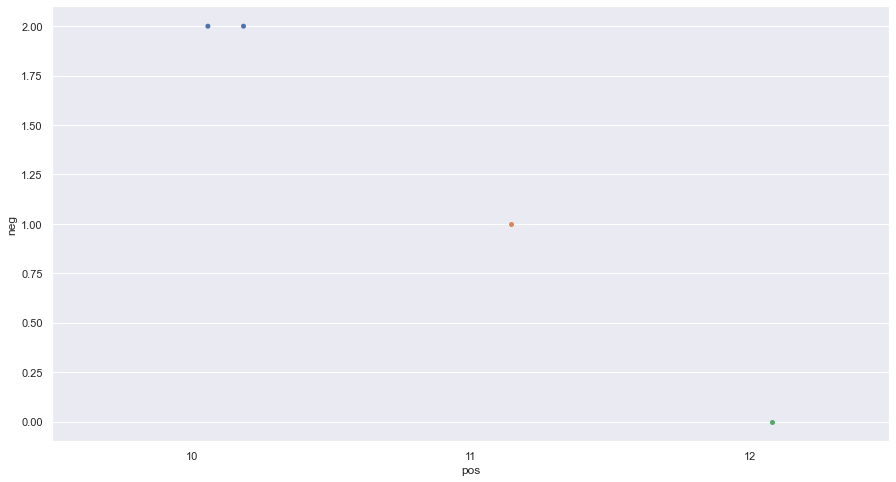

In [39]:
rdk_pos_threshold = 0.65
rdk_neg_threshold = 0.6

fig = plt.figure(figsize=(15,8))
rdk_new_posneg_counts = f(rdk_results_posneg_df, rdk_pos_threshold, rdk_neg_threshold)
plot = sns.stripplot(data=rdk_new_posneg_counts, x = 'pos', y='neg', jitter=0.2)

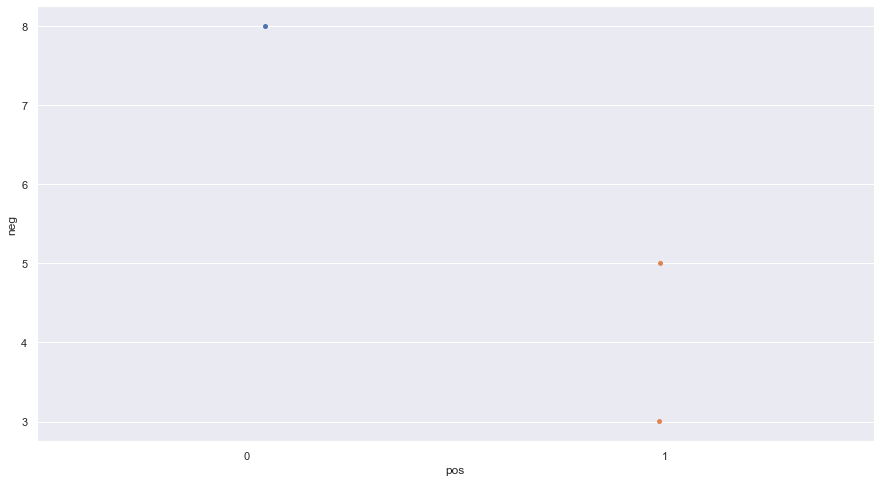

In [40]:
bandit_pos_threshold = 0.65
bandit_neg_threshold = 0.4

fig = plt.figure(figsize=(15,8))
bandit_new_posneg_counts = f(bandit_results_posneg_df, bandit_pos_threshold, bandit_neg_threshold)
plot = sns.stripplot(data=bandit_new_posneg_counts, x = 'pos', y='neg')

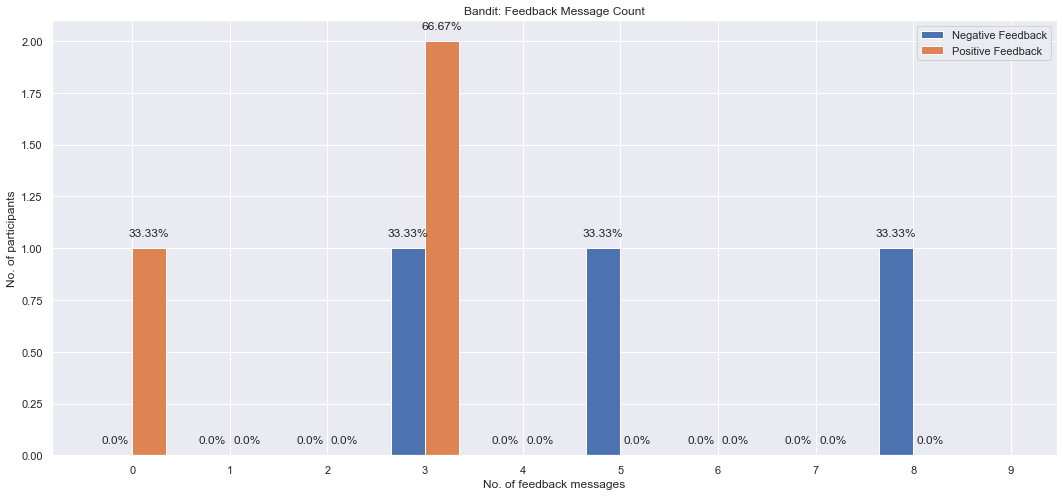

In [41]:
bandit_pos_threshold = 0.5
bandit_neg_threshold = 0.4
bandit_new_posneg_counts = f(bandit_results_posneg_df, bandit_pos_threshold, bandit_neg_threshold)

fig, ax = plt.subplots(figsize=(18,8))
participants = len(bandit_new_posneg_counts)
lower = ax.hist(bandit_new_posneg_counts["neg"], bins=np.arange(0, 10)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(bandit_new_posneg_counts["pos"], bins=np.arange(0, 10), label='Positive Feedback', width=width)
ax.set_title('Bandit: Feedback Message Count')
ax.set_xticks(np.arange(0, 10))
ax.set_ylabel('No. of participants')
ax.set_xlabel('No. of feedback messages')

for rect1 in ax.patches:
    height = rect1.get_height()
    plt.annotate( "{}%".format(round(height*100/participants, 2)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=12)
ax.legend()
plt.show()

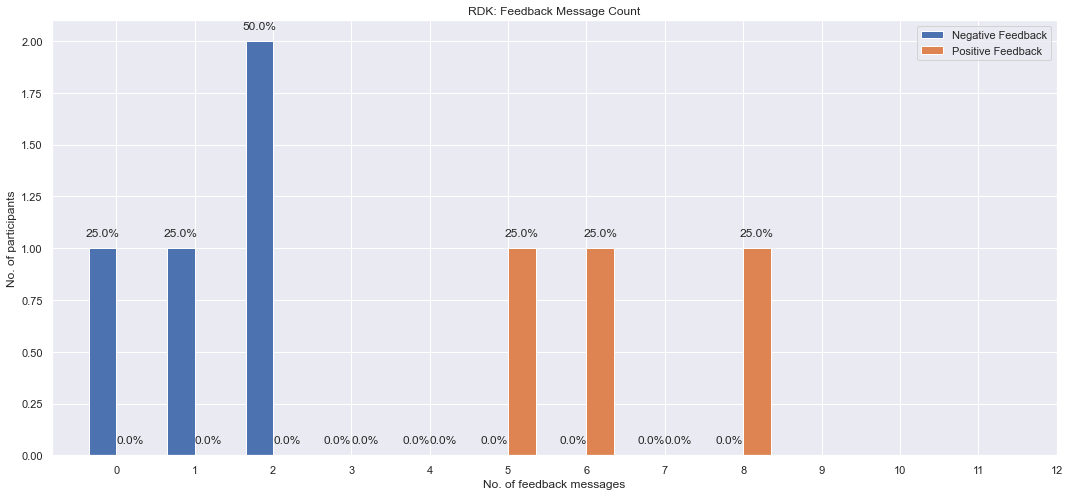

In [42]:
rdk_pos_threshold = 0.75
rdk_neg_threshold = 0.65
rdk_new_posneg_counts = f(rdk_results_posneg_df, rdk_pos_threshold, rdk_neg_threshold)

fig, ax = plt.subplots(figsize=(18,8))
participants = len(rdk_new_posneg_counts)
lower = ax.hist(rdk_new_posneg_counts["neg"], bins=np.arange(0, 10)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(rdk_new_posneg_counts["pos"], bins=np.arange(0, 10), label='Positive Feedback', width=width)
ax.set_title('RDK: Feedback Message Count')
ax.set_xticks(np.arange(0, 13))
ax.set_ylabel('No. of participants')
ax.set_xlabel('No. of feedback messages')

for rect1 in ax.patches:
    height = rect1.get_height()
    plt.annotate( "{}%".format(round(height*100/participants, 2)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=12)
ax.legend()
plt.show()

[12 10]


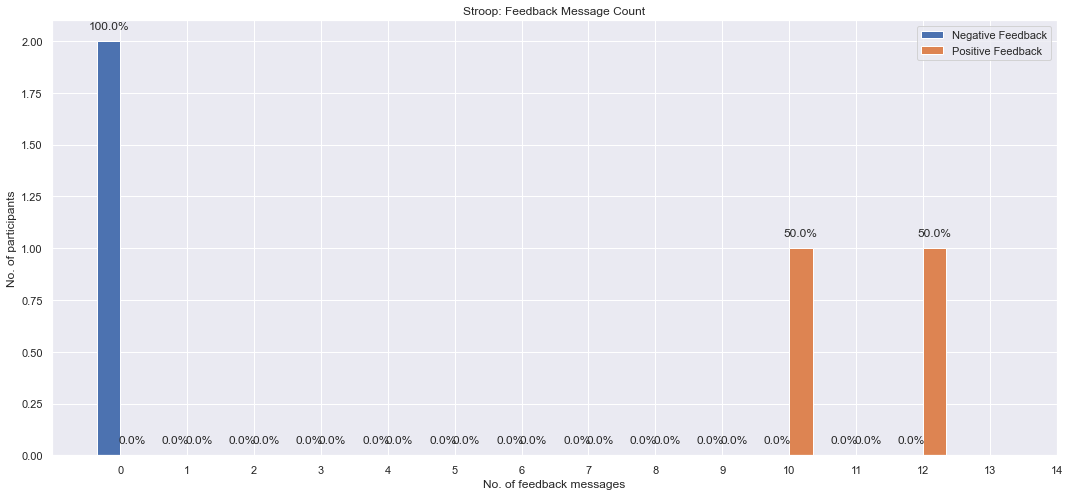

In [43]:
stroop_pos_threshold = 0.90
stroop_neg_threshold = 0.8
stroop_new_posneg_counts = f(stroop_results_posneg_df, stroop_pos_threshold, stroop_neg_threshold)
print(stroop_new_posneg_counts["pos"].unique())
fig, ax = plt.subplots(figsize=(18,8))
participants = len(stroop_new_posneg_counts)
lower = ax.hist(stroop_new_posneg_counts["neg"], bins=np.arange(0, 14)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(stroop_new_posneg_counts["pos"], bins=np.arange(0, 14), label='Positive Feedback', width=width)
ax.set_title('Stroop: Feedback Message Count')
ax.set_xticks(np.arange(0, 15))
ax.set_ylabel('No. of participants')
ax.set_xlabel('No. of feedback messages')

for rect1 in ax.patches:
    height = rect1.get_height()
    plt.annotate( "{}%".format(round(height*100/participants, 2)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=12)
ax.legend()
plt.show()